In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/highland_rows (2).csv', sep=',')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1971 non-null   int64  
 1   Year              1971 non-null   int64  
 2   City              1971 non-null   object 
 3   Brand             1971 non-null   object 
 4   Spontaneous       1662 non-null   object 
 5   Awareness         1971 non-null   object 
 6   Trial             1971 non-null   object 
 7   P3M               1971 non-null   object 
 8   P1M               1971 non-null   object 
 9   Comprehension     780 non-null    object 
 10  Brand_Likability  742 non-null    object 
 11  Weekly            1338 non-null   object 
 12  Daily             808 non-null    object 
 13  Fre#visit         1971 non-null   float64
 14  PPA               1971 non-null   float64
 15  Spending          1971 non-null   float64
 16  Segmentation      1971 non-null   object 


In [ ]:
df['Spontaneous'] = df['Spontaneous'].notna().astype(int)
df['Awareness'] = df['Awareness'].notna().astype(int)
df['Trial'] = df['Trial'].notna().astype(int)
df['P3M'] = df['P3M'].notna().astype(int)
df['P1M'] = df['P1M'].notna().astype(int)
df['Brand_Likability'] = df['Brand_Likability'].notna().astype(int)
df['Weekly'] = df['Weekly'].notna().astype(int)
df['Daily'] = df['Daily'].notna().astype(int)

In [ ]:
mapping = {
    'Do not know it at all': 1,
    'Maybe do not know it': 2,
    'Know a little': 3,
    'Know it well': 4,
    'Know it very well': 5
}

df['Comprehension'] = df['Comprehension'].map(mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1971 non-null   int64  
 1   Year              1971 non-null   int64  
 2   City              1971 non-null   object 
 3   Brand             1971 non-null   object 
 4   Spontaneous       1971 non-null   int64  
 5   Awareness         1971 non-null   int64  
 6   Trial             1971 non-null   int64  
 7   P3M               1971 non-null   int64  
 8   P1M               1971 non-null   int64  
 9   Comprehension     780 non-null    float64
 10  Brand_Likability  1971 non-null   int64  
 11  Weekly            1971 non-null   int64  
 12  Daily             1971 non-null   int64  
 13  Fre#visit         1971 non-null   float64
 14  PPA               1971 non-null   float64
 15  Spending          1971 non-null   float64
 16  Segmentation      1971 non-null   object 


In [ ]:
df.to_csv('highland_rows_modified.csv', index=False)

In [ ]:
features = [
    'Fre#visit', 'PPA', 'Spending', 'Spending_use', 'NPS#P3M',
    'Comprehension', 'Brand_Likability', 'Weekly', 'Daily'
]

In [ ]:
# Danh sách các cột cần lấy
features = [
    'Fre#visit', 'PPA', 'Spending', 'NPS#P3M', 'Brand_Likability', 'Weekly', 'Daily'
]

# Tạo DataFrame mới chỉ gồm các cột trên
df_new = df[features].copy()

# Hiển thị 5 dòng đầu để kiểm tra
print(df_new.head())


   Fre#visit   PPA  Spending  NPS#P3M  Brand_Likability  Weekly  Daily
0       20.0  50.0    1000.0      8.0                 1       1      1
1       20.0  29.0     580.0     10.0                 1       1      1
2       20.0  50.0    1000.0      9.0                 1       1      1
3       30.0  50.0    1500.0      9.0                 1       1      1
4       25.0  50.0    1250.0     10.0                 1       1      1


In [ ]:
df_new.to_csv('df_new.csv', index=False)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Sao chép dữ liệu gốc để xử lý
data = df_new.copy()




# Loại bỏ các dòng có giá trị thiếu
X = data[features].dropna()

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Huấn luyện mô hình KMeans với k=3
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Gán nhãn cụm vào dữ liệu
X_clustered = X.copy()
X_clustered['Cluster'] = clusters

# Hiển thị số lượng khách hàng trong mỗi cụm
print(X_clustered['Cluster'].value_counts())

# Hiển thị trung bình các đặc trưng theo cụm
print(X_clustered.groupby('Cluster').mean())


Cluster
1    739
2    633
0    508
3     91
Name: count, dtype: int64
         Fre#visit        PPA    Spending   NPS#P3M  Brand_Likability  Weekly  \
Cluster                                                                         
0         5.946850  53.393701  313.895669  8.929134          0.000000     1.0   
1         3.721245  49.694181  182.159675  8.794317          0.948579     1.0   
2         1.938389  52.669826  101.214850  8.437599          0.000000     0.0   
3        18.406593  58.054945  955.175824  9.208791          0.450549     1.0   

            Daily  
Cluster            
0        0.000000  
1        1.000000  
2        0.000000  
3        0.758242  


In [ ]:
X_clustered.to_csv('X_clustered.csv', index=False)

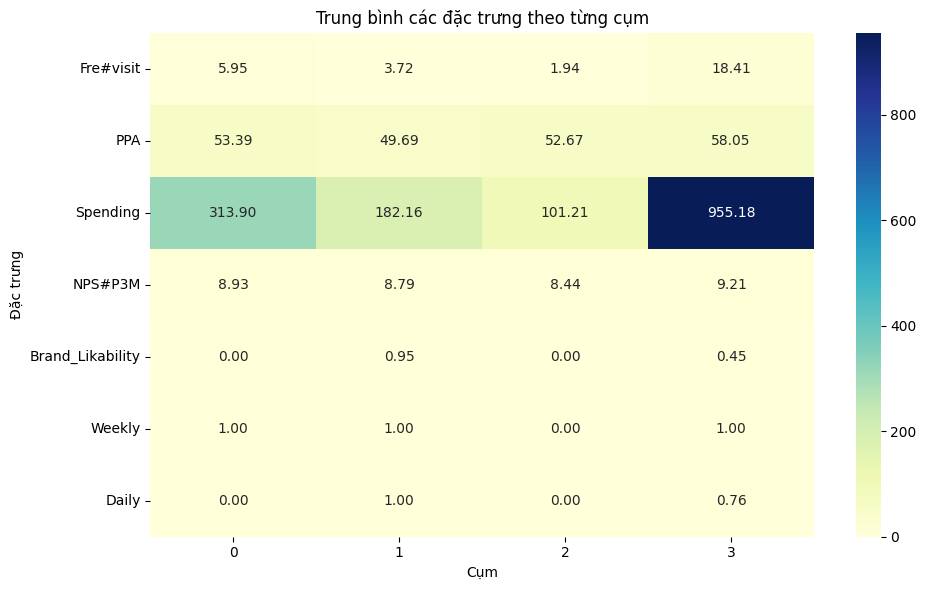

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử DataFrame bạn tên là df
# Cột cuối cùng là cột phân cụm (cột thứ 9)
# Lấy tên cột phân cụm
cluster_col = X_clustered.columns[-1]  # Cột thứ 9
feature_cols = X_clustered.columns[:-1]  # 8 cột đặc trưng đầu

# Tính giá trị trung bình của từng đặc trưng theo từng cụm
group_means = X_clustered.groupby(cluster_col)[feature_cols].mean()

# Vẽ heatmap đặc trưng của từng cụm
plt.figure(figsize=(10, 6))
sns.heatmap(group_means.T, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Trung bình các đặc trưng theo từng cụm')
plt.xlabel('Cụm')
plt.ylabel('Đặc trưng')
plt.tight_layout()
plt.show()


/tmp/ipython-input-44-3692162344.py:19: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128315 (\N{DOWN-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


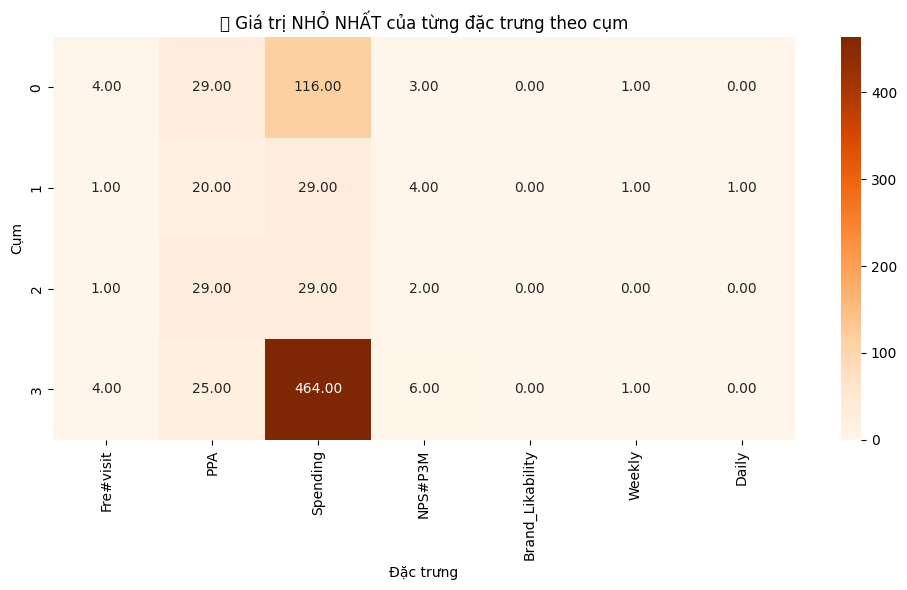

/tmp/ipython-input-44-3692162344.py:28: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128314 (\N{UP-POINTING RED TRIANGLE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


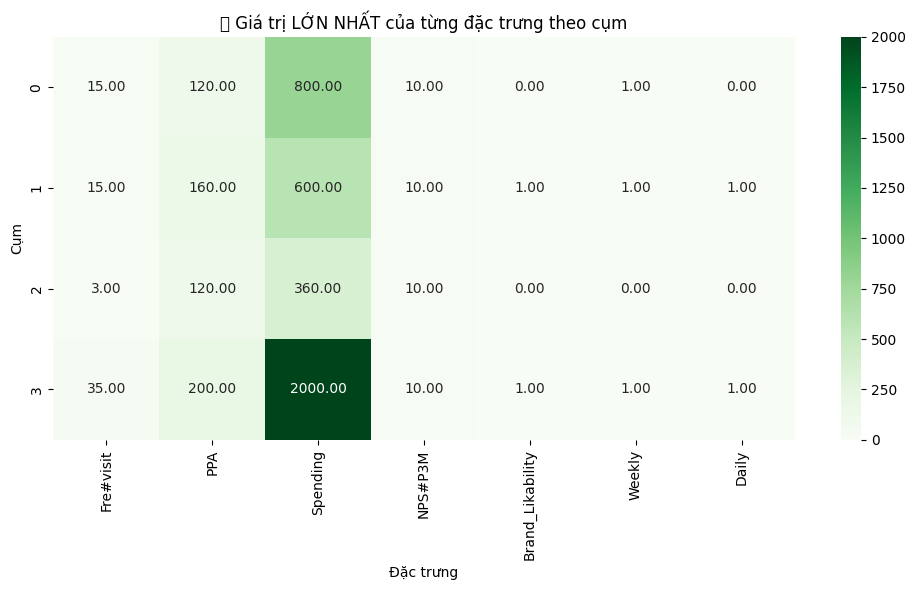

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lấy tên cột phân cụm và các đặc trưng
cluster_col = X_clustered.columns[-1]      # Cột thứ 9: gom nhóm
feature_cols = X_clustered.columns[:-1]    # 8 cột đặc trưng đầu

# Tính min và max theo từng cụm
group_min = X_clustered.groupby(cluster_col)[feature_cols].min()
group_max = X_clustered.groupby(cluster_col)[feature_cols].max()

# Vẽ heatmap MIN
plt.figure(figsize=(10, 6))
sns.heatmap(group_min, annot=True, cmap='Oranges', fmt='.2f')
plt.title('🔻 Giá trị NHỎ NHẤT của từng đặc trưng theo cụm')
plt.xlabel('Đặc trưng')
plt.ylabel('Cụm')
plt.tight_layout()
plt.show()

# Vẽ heatmap MAX
plt.figure(figsize=(10, 6))
sns.heatmap(group_max, annot=True, cmap='Greens', fmt='.2f')
plt.title('🔺 Giá trị LỚN NHẤT của từng đặc trưng theo cụm')
plt.xlabel('Đặc trưng')
plt.ylabel('Cụm')
plt.tight_layout()
plt.show()


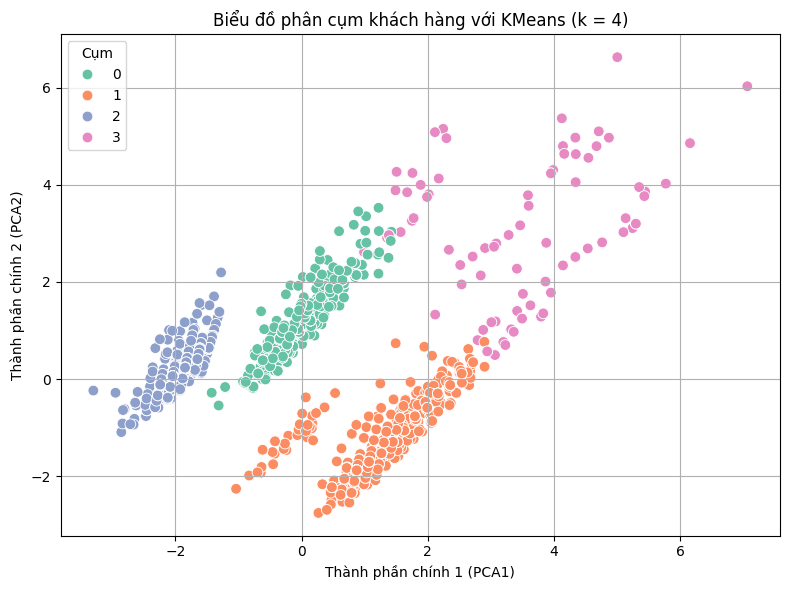

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Giảm chiều dữ liệu xuống 2D bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Tạo DataFrame để trực quan hóa
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title('Biểu đồ phân cụm khách hàng với KMeans (k = 4)')
plt.xlabel('Thành phần chính 1 (PCA1)')
plt.ylabel('Thành phần chính 2 (PCA2)')
plt.legend(title='Cụm')
plt.grid(True)
plt.tight_layout()
plt.show()

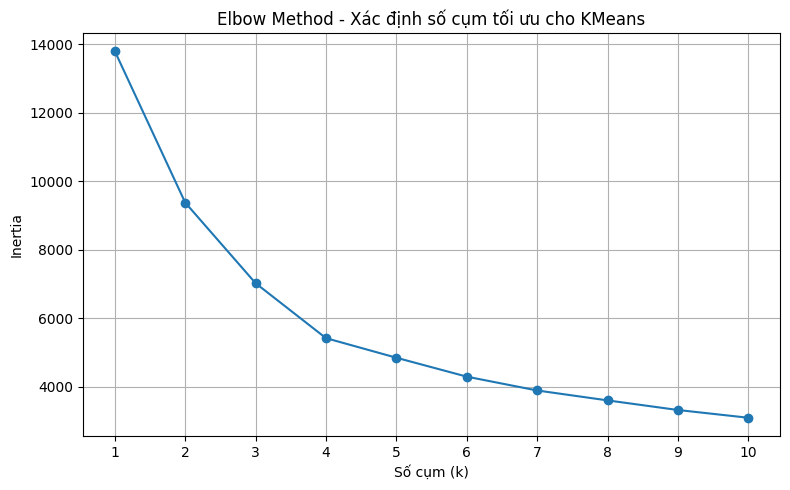

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Bước 1: Chuẩn hóa dữ liệu (nếu chưa)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_new.dropna())

# Bước 2: Elbow Method để tìm số cụm tối ưu
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Bước 3: Vẽ biểu đồ Elbow
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method - Xác định số cụm tối ưu cho KMeans')
plt.xlabel('Số cụm (k)')
plt.ylabel('Inertia')
plt.xticks(K)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])

# Hiển thị 5 dòng đầu tiên
print(pca_df.head())

       PCA1      PCA2
0  3.920527  3.132951
1  3.417004  1.708369
2  4.303708  2.717732
3  6.723372  4.851372
4  5.896720  3.369333


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
columns = df_new.dropna().columns

# Lấy ma trận thành phần chính
pca_components = pd.DataFrame(pca.components_, columns=columns, index=['PCA1', 'PCA2'])

# Hiển thị
print(pca_components)

      Fre#visit       PPA  Spending   NPS#P3M  Brand_Likability    Weekly  \
PCA1   0.395980  0.005295  0.379330  0.208754          0.436468  0.497239   
PCA2   0.462858  0.267447  0.539261  0.185669         -0.458074 -0.066217   

         Daily  
PCA1  0.466852  
PCA2 -0.418023  
